## 19.5) 1번
## 직사각형 공식(rectangular rule)

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sympy
# sympy.init_printing()
from scipy import integrate

In [13]:
x = sympy.symbols("x")
exp = sympy.exp(-x**2)
exact_awnwer = sympy.integrate(exp, (x, 0, 1)).evalf(8)
exact_awnwer

0.74682413

In [30]:
# trapezoidal
def func(x):
    return np.exp(-x**2)

h = 0.1
int_sum = 0 # integration 값을 담는 그릇
xj = 0
for j in range(11):
    if j == 0 or j == 10:
        int_sum += func(xj)*0.5*h
    else:
        int_sum += func(xj)*h
    print('j= {:<2}, xj= {:<3}, function= {:<5}'.format(j, np.round(xj,2), func(xj)))
    xj += h
print(int_sum)

trape_error = int_sum-exact_awnwer
print('% error trapezoidal:',abs(trape_error/exact_awnwer*100))

j= 0 , xj= 0  , function= 1.0  
j= 1 , xj= 0.1, function= 0.9900498337491681
j= 2 , xj= 0.2, function= 0.9607894391523232
j= 3 , xj= 0.3, function= 0.9139311852712282
j= 4 , xj= 0.4, function= 0.8521437889662113
j= 5 , xj= 0.5, function= 0.7788007830714049
j= 6 , xj= 0.6, function= 0.697676326071031
j= 7 , xj= 0.7, function= 0.6126263941844161
j= 8 , xj= 0.8, function= 0.5272924240430487
j= 9 , xj= 0.9, function= 0.4448580662229412
j= 10, xj= 1.0, function= 0.3678794411714424
0.7462107961317493
% error trapezoidal: 0.0821260388973603


In [32]:
# rectangular
def func(x):
    return np.exp(-x**2)

h = 0.1
int_sum = 0 # integration 값을 담는 그릇
xj = 0.05
for j in range(10):
    int_sum += func(xj)*h
    print('j= {:<2}, xj= {:<3}, function= {:<5}'.format(j, np.round(xj,2), func(xj)))
    xj += h
print(int_sum)

rec_error = int_sum-exact_awnwer
print('% error trapezoidal:',abs(rec_error/exact_awnwer*100))

j= 0 , xj= 0.05, function= 0.9975031223974601
j= 1 , xj= 0.15, function= 0.9777512371933363
j= 2 , xj= 0.25, function= 0.9394130628134758
j= 3 , xj= 0.35, function= 0.8847059049434836
j= 4 , xj= 0.45, function= 0.8166864825981108
j= 5 , xj= 0.55, function= 0.7389684882589443
j= 6 , xj= 0.65, function= 0.6554062543268406
j= 7 , xj= 0.75, function= 0.5697828247309231
j= 8 , xj= 0.85, function= 0.48553689515407955
j= 9 , xj= 0.95, function= 0.40555450506332064
0.7471308777479975
% error trapezoidal: 0.0410731957462193


## 19.5) 14번
## Differentiation

In [33]:
import numpy as np
def f(x):
    return x**4


f0 = f(0)
f1 = f(0.2)
f2 = f(0.4)
f3 = f(0.6)
f4 = f(0.8)
h = 0.2
#(15)번 식
f2_diff = (f0-8*f1+8*f3-f4)/(12*h)

#오차 구하기
def f_real(x):
    return 4*x**3

f2_diff_real = f_real(0.4)
f2_diff_real

error = f2_diff_real - f2_diff


print('f2_diff={:6}, f2_diff_real={:6}, error = {:6} '.format(f2_diff, f2_diff_real, error))

f2_diff=0.25599999999999995, f2_diff_real=0.25600000000000006, error = 1.1102230246251565e-16 


## 연습문제 20.5 1번 Least Squares

-1.0384615384615383 1.8461538461538458


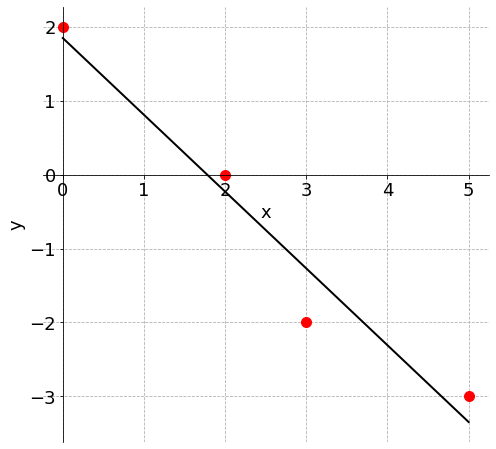

In [43]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

a = 3 # True slope
b = 5
x = np.array([0, 2, 3, 5])
y = np.array([2, 0, -2, -3])

A = np.stack((x,np.ones(x.shape)),axis=1)
B = y

U, S, VT = np.linalg.svd(A,full_matrices=False)
pinv = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
(a, b) =  pinv @ B # Least-square fit
print(a, b)

xl = np.arange(0,5.2,0.2)
yl = a*xl+b

fig, ax = plt.subplots()
ax.plot(xl, yl, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'o', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


## 20.5 4번 A Hooke’s Law Example of Least Squares


[0.31757813] 0.01914062499999991
spring constant = 0.31757812500000004 N/m


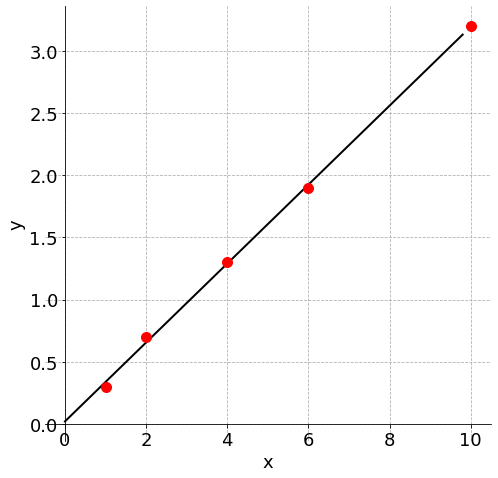

In [52]:
x = [1, 2, 4, 6, 10]
y = [0.3, 0.7, 1.3, 1.9, 3.2]
x = np.array(x)
x = x[:,np.newaxis]  # x should be always => dimension >2
y = np.array(y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
a, b = reg.coef_, reg.intercept_

print(a, b)

xl = np.arange(0,10,0.2)
yl = a*xl+b

fig, ax = plt.subplots()
ax.plot(xl, yl, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'o', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

print('spring constant = {} N/m'.format(a[0]))


## 연습문제 21.1 1번 Euler Method

In [58]:
# y' = f(x,y) 
# f(x,y) = -0.2*y

def f_x_y(x,y):
    return -0.2*y

# y(0) = 5
xi = 0
yi = 5
h = 0.2

# y1 = y0 + h*f(x0,y0)

N = 10

x_numerical = []
y_numerical = []

for i in range(N):
    yip1 = yi + h*f_x_y(xi,yi)
    print('i={:<2}, xi={:<3}, yi={:6}'.format(i,round(xi,2),yi))
    # Euler 계산 끝
    x_numerical.append(xi)
    y_numerical.append(yi)
        
    # 다음 업데이틀 위한 xi <- xi+1 , yi <- yi+1
    xi = xi + h
    yi = yip1

i=0 , xi=0  , yi=     5
i=1 , xi=0.2, yi=   4.8
i=2 , xi=0.4, yi= 4.608
i=3 , xi=0.6, yi=4.42368
i=4 , xi=0.8, yi=4.2467328
i=5 , xi=1.0, yi=4.076863488
i=6 , xi=1.2, yi=3.9137889484799997
i=7 , xi=1.4, yi=3.7572373905407996
i=8 , xi=1.6, yi=3.6069478949191676
i=9 , xi=1.8, yi=3.462669979122401


In [55]:
x = sympy.symbols("x")
y = sympy.Function("y")

f = -0.2*y(x)
sympy.Eq(y(x).diff(x), f)


Eq(Derivative(y(x), x), -0.2*y(x))

In [56]:
ode_sol = sympy.dsolve(y(x).diff(x) - f)
ode_sol

Eq(y(x), C1*exp(-0.2*x))

In [57]:
ics = {y(0): 5}
ode_sol = sympy.dsolve(y(x).diff(x) - f,ics = ics)
ode_sol

Eq(y(x), 5*exp(-0.2*x))

Text(0, 0.5, 'y')

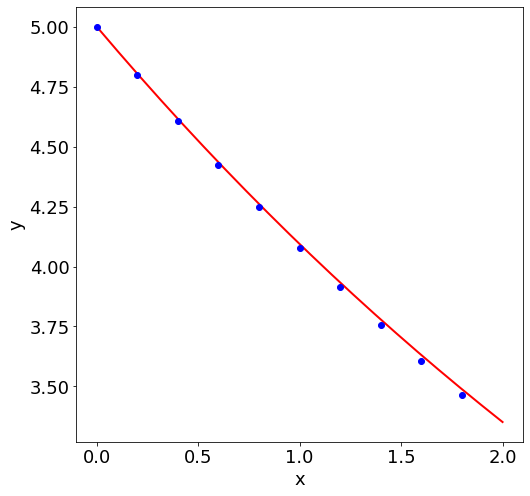

In [63]:
x_vec = np.linspace(0, 2, 20)

plt.figure()
plt.plot(x_vec, 5*np.exp(-0.2*x_vec), 'r', lw=2)
plt.plot(x_numerical, y_numerical, 'o', color='b')
plt.xlabel('x')
plt.ylabel('y')

## 연습문제 21.1, 11번 Runge-Kutta Method of Fourth Order

In [65]:
x = sympy.symbols("x")
y = sympy.Function("y")

f = x*y(x)**2
ode_sol = sympy.dsolve(y(x).diff(x) - f)
ics = {y(0): 1}
ode_sol = sympy.dsolve(y(x).diff(x) - f,ics = ics)
ode_sol

Eq(y(x), -2/(x**2 - 2))

In [71]:
# y' = f(x,y) 
# f(x,y) = x*y(x)**2

def f_x_y(x,y):
    return x*y**2

# y(0) = 5
xi = 0
yi = 1
h = 0.1

# Fourth Runge-Kutta
# y1 = y0 + h/6*(K1+2*K2+2*K3+K4)
# K1 = f(x0,y0)
# K2 = f(x0+h/2,y0+h/2*K1)
# K3 = f(x0+h/2,y0+h/2*K2)
# K4 = f(x0+h,y0+h*K3)

N = 10

x_numerical = []
y_numerical = []

for i in range(N):
    K1 = f_x_y(xi,yi)
    K2 = f_x_y(xi+h/2,yi+h/2*K1)
    K3 = f_x_y(xi+h/2,yi+h/2*K2)
    K4 = f_x_y(xi+h,yi+h*K3)
    yip1 = yi + h/6*(K1+2*K2+2*K3+K4)
    print('i={:<2}, xi={:<3}, yi={:6}'.format(i,round(xi,2),yi))
    # Euler 계산 끝
    x_numerical.append(xi)
    y_numerical.append(yi)
        
    # 다음 업데이틀 위한 xi <- xi+1 , yi <- yi+1
    xi = xi + h
    yi = yip1

i=0 , xi=0  , yi=     1
i=1 , xi=0.1, yi=1.0050251359390652
i=2 , xi=0.2, yi=1.0204082056816612
i=3 , xi=0.3, yi=1.0471205219541164
i=4 , xi=0.4, yi=1.0869567284316088
i=5 , xi=0.5, yi=1.1428575201461912
i=6 , xi=0.6, yi=1.219512843620599
i=7 , xi=0.7, yi=1.3245043524416344
i=8 , xi=0.8, yi=1.4705896530855818
i=9 , xi=0.9, yi=1.680672908126619


Text(0, 0.5, 'y')

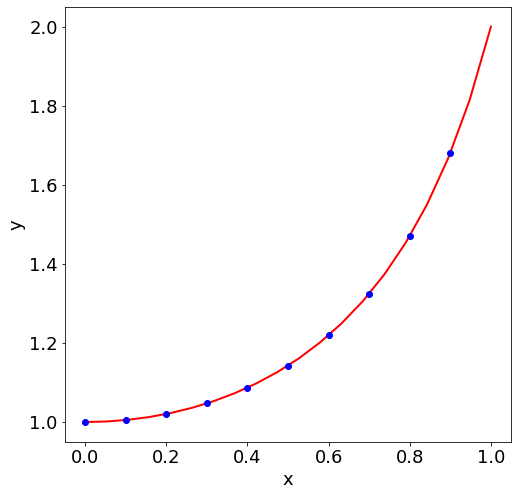

In [72]:
x_vec = np.linspace(0, 1, 20)
y_func = sympy.lambdify((x), ode_sol.rhs, 'numpy')
y_vec = y_func(x_vec)

plt.figure()
plt.plot(x_vec, y_vec, 'r', lw=2)
plt.plot(x_numerical, y_numerical, 'o', color='b')
plt.xlabel('x')
plt.ylabel('y')